In [240]:
#%pip install -r requirements.txt

In [241]:
# imports

# Standard library imports
import os
from pathlib import Path
from collections import defaultdict

# Third-party imports
import pyreadstat
import numpy as np
from scipy.stats import skew
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.offline as py
import plotly.graph_objs as go


In [242]:
# Check the contents of the 'Dataset' folder inside the extracted path
current_working_dir = os.getcwd()
current_working_dir

'c:\\DEPI_Project - 2025'

In [243]:
path = os.path.join(current_working_dir, "dataset/CSV/Diabetes.csv")

df = pd.read_csv(path)


In [244]:
display(df.info(),df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5437 entries, 0 to 5436
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     5437 non-null   int64  
 1   gender                  5437 non-null   object 
 2   pulse_rate              5437 non-null   int64  
 3   systolic_bp             5437 non-null   int64  
 4   diastolic_bp            5437 non-null   int64  
 5   glucose                 5437 non-null   float64
 6   height                  5437 non-null   float64
 7   weight                  5437 non-null   float64
 8   bmi                     5437 non-null   float64
 9   family_diabetes         5437 non-null   int64  
 10  hypertensive            5437 non-null   int64  
 11  family_hypertension     5437 non-null   int64  
 12  cardiovascular_disease  5437 non-null   int64  
 13  stroke                  5437 non-null   int64  
 14  diabetic                5437 non-null   

None

,age,gender,pulse_rate,systolic_bp,diastolic_bp,glucose,height,weight,bmi,family_diabetes,hypertensive,family_hypertension,cardiovascular_disease,stroke,diabetic
0,42,Female,66,110,73,5.88,1.65,70.2,25.75,0,0,0,0,0,No
1,35,Female,60,125,68,5.71,1.47,42.5,19.58,0,0,0,0,0,No
2,62,Female,57,127,74,6.85,1.52,47.0,20.24,0,0,0,0,0,No
3,73,Male,55,193,112,6.28,1.63,57.4,21.72,0,0,0,0,0,No
4,68,Female,71,150,81,5.71,1.42,36.0,17.79,0,0,0,0,0,No


In [331]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
5432    False
5433    False
5434    False
5435    False
5436    False
Length: 5437, dtype: bool

In [245]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,5437.0,45.533750,14.321155,8.00,35.00,45.00,55.00,112.00
pulse_rate,5437.0,76.768990,12.290076,5.00,69.00,76.00,84.00,133.00
systolic_bp,5437.0,133.859849,22.293015,62.00,119.00,130.00,147.00,231.00
diastolic_bp,5437.0,82.064742,12.489593,45.00,73.00,81.00,90.00,119.00
glucose,5437.0,7.540682,2.923080,0.00,6.00,6.92,8.12,33.46
height,5437.0,1.548571,0.080955,0.36,1.52,1.55,1.60,1.96
weight,5437.0,53.626816,10.091550,3.00,46.70,53.00,59.90,100.70
bmi,5437.0,22.472301,8.778764,1.22,19.63,21.87,24.49,574.13
family_diabetes,5437.0,0.037337,0.189603,0.00,0.00,0.00,0.00,1.00
hypertensive,5437.0,0.109803,0.312673,0.00,0.00,0.00,0.00,1.00


In [246]:
print(df.shape)
print("###############")
print(df.dtypes.unique)
print("###############")


(5437, 15)
###############
<bound method Series.unique of age                         int64
gender                     object
pulse_rate                  int64
systolic_bp                 int64
diastolic_bp                int64
glucose                   float64
height                    float64
weight                    float64
bmi                       float64
family_diabetes             int64
hypertensive                int64
family_hypertension         int64
cardiovascular_disease      int64
stroke                      int64
diabetic                   object
dtype: object>
###############


In [247]:
unique_values = {col: df[col].unique().tolist() for col in df.columns}

# Display the result
for col, values in unique_values.items():
    print(f"Unique values in column '{col}': {values}")

Unique values in column 'age': [42, 35, 62, 73, 68, 40, 25, 50, 70, 56, 32, 46, 30, 54, 65, 55, 60, 29, 52, 26, 45, 58, 75, 57, 18, 20, 22, 64, 28, 24, 51, 33, 38, 63, 27, 53, 61, 49, 59, 23, 48, 31, 37, 67, 47, 36, 66, 44, 43, 39, 74, 77, 85, 41, 34, 72, 80, 90, 15, 71, 21, 76, 19, 97, 82, 79, 78, 94, 105, 69, 84, 95, 17, 13, 14, 93, 100, 102, 16, 88, 12, 112, 103, 83, 8]
Unique values in column 'gender': ['Female', 'Male']
Unique values in column 'pulse_rate': [66, 60, 57, 55, 71, 48, 84, 80, 64, 72, 73, 76, 85, 89, 99, 79, 75, 62, 78, 70, 68, 81, 59, 69, 58, 83, 67, 61, 65, 56, 74, 82, 104, 77, 63, 92, 54, 97, 86, 40, 91, 50, 46, 105, 94, 95, 87, 111, 53, 88, 100, 90, 98, 52, 93, 123, 106, 121, 101, 51, 109, 47, 107, 96, 102, 110, 114, 113, 116, 108, 129, 43, 119, 103, 133, 38, 112, 115, 37, 130, 49, 131, 118, 125, 39, 36, 45, 120, 5, 117, 10, 44]
Unique values in column 'systolic_bp': [110, 125, 127, 193, 150, 131, 123, 152, 135, 129, 130, 114, 142, 147, 137, 128, 174, 149, 226, 15

In [248]:
df.isnull().sum(axis=0)

age                       0
gender                    0
pulse_rate                0
systolic_bp               0
diastolic_bp              0
glucose                   0
height                    0
weight                    0
bmi                       0
family_diabetes           0
hypertensive              0
family_hypertension       0
cardiovascular_disease    0
stroke                    0
diabetic                  0
dtype: int64

# Data Type & Preprocessing Guide for Variables


In [249]:
def print_unique_type_valuecount(df, column_name):
    # Check if df is defined and is a DataFrame
    if df is None or not isinstance(df, pd.DataFrame):
        print("Error: The provided object is not a valid DataFrame.")
        return

    # Check if the column exists in the DataFrame
    if column_name not in df.columns:
        print(f"Error: Column '{column_name}' not found in the DataFrame.")
        return

    # Proceed with printing info
    print("Unique values:")
    print(df[column_name].unique())

    print("\nData type:")
    print(df[column_name].dtype)

    print("\nFrequency of unique values:")
    print(df[column_name].value_counts(dropna=False))


# Gender  Data Processing Guide

### Data Source
https://data.mendeley.com/datasets/7m7555vgrn/1 
### Variables
###  "Gender"
### Recommended Data Type
**Primary Type**: `pandas.boolean`

| Code| Value Description |
|-----|-------------------|
| 1   | Male              |
| 0   | Female            |




In [250]:
new_df=df.copy()

In [251]:
print_unique_type_valuecount(new_df,"gender")

Unique values:
['Female' 'Male']

Data type:
object

Frequency of unique values:
gender
Female    3859
Male      1578
Name: count, dtype: int64


In [252]:

new_df["gender"]=new_df["gender"].replace({"Male":1,"Female":0})
new_df["gender"]=new_df["gender"].astype("boolean")

C:\Users\Mostafa.Elgamal\AppData\Local\Temp\ipykernel_25348\1035040771.py:1: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



# Target Variable Diabetes Preprocessing Guide

### Data Source
(https://data.mendeley.com/datasets/7m7555vgrn/1)

### Variables
-  diabetes?

## Variable Overview
### Coding Scheme

| Code | Value Description |
|------|-------------------|
| 1    | Yes               |
| 0    | No                |


### Recommended Data Type
- **Primary Type**: `pandas.boolean`


In [253]:
print_unique_type_valuecount(new_df,"diabetic")

Unique values:
['No' 'Yes']

Data type:
object

Frequency of unique values:
diabetic
No     5093
Yes     344
Name: count, dtype: int64


In [254]:
# Map values
new_df["diabetic"] = new_df["diabetic"].replace({"No": 0, "Yes": 1})

# Convert to boolean type
new_df["diabetic"] = new_df["diabetic"].astype("boolean")


C:\Users\Mostafa.Elgamal\AppData\Local\Temp\ipykernel_25348\2635426941.py:2: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



# Glucose

### Convert glucose from mmol/L to mg/dL
### mmol/L equals approximately 18 mg/dL

In [255]:
new_df["glucose"]=new_df["glucose"]*18

In [256]:

new_df["family_diabetes"] = new_df["family_diabetes"].astype("boolean")
new_df["hypertensive"] = new_df["hypertensive"].astype("boolean")
new_df["family_hypertension"] = new_df["family_hypertension"].astype("boolean")
new_df["cardiovascular_disease"] = new_df["cardiovascular_disease"].astype("boolean")
new_df["stroke"] = new_df["stroke"].astype("boolean")

In [257]:
count_numerical = 0
count_boolean = 0
for col in new_df.columns:
    if new_df[col].dtype == "boolean"  :
        count_boolean +=1
    else:
        count_numerical += 1
print(new_df.shape, count_boolean, count_numerical)

(5437, 15) 7 8


C:\Users\Mostafa.Elgamal\AppData\Local\Temp\ipykernel_25348\1045225347.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




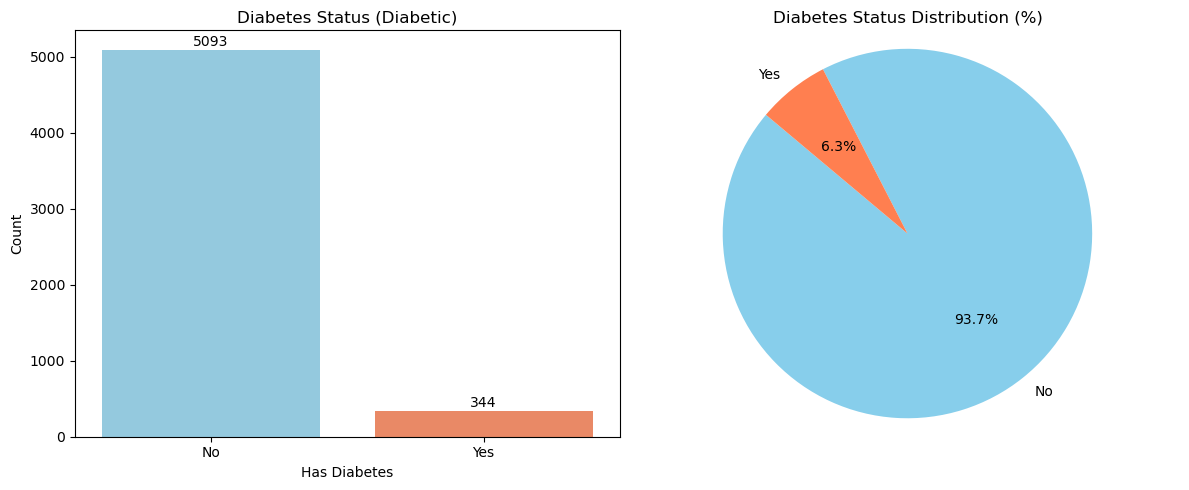

In [258]:

# Get counts
counts = new_df["diabetic"].value_counts()
labels = ['No', 'Yes']
colors = ['skyblue', 'coral']

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# --- Bar Plot ---
sns.barplot(x=counts.index, y=counts.values, palette=colors, ax=axes[0])
axes[0].set_title('Diabetes Status (Diabetic)')
axes[0].set_xlabel('Has Diabetes')
axes[0].set_ylabel('Count')
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(labels)

# Annotate bar values
for i, count in enumerate(counts.values):
    axes[0].text(i, count + 50, str(count), ha='center')

# --- Pie Chart ---
axes[1].pie(counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
axes[1].set_title('Diabetes Status Distribution (%)')
axes[1].axis('equal')  # Ensures pie is circular

plt.tight_layout()
plt.show()


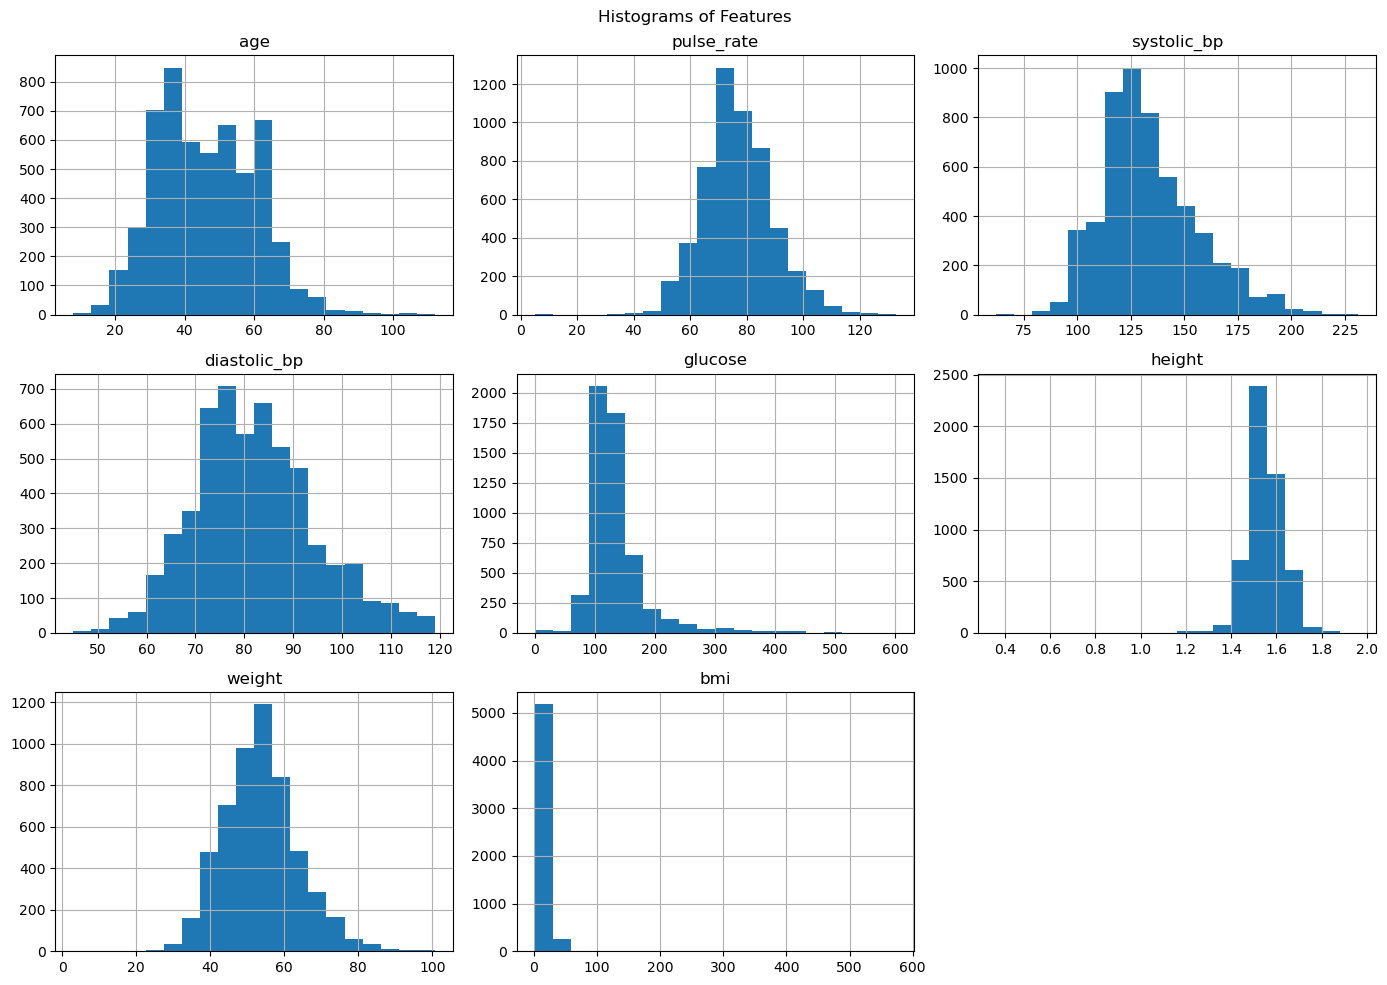

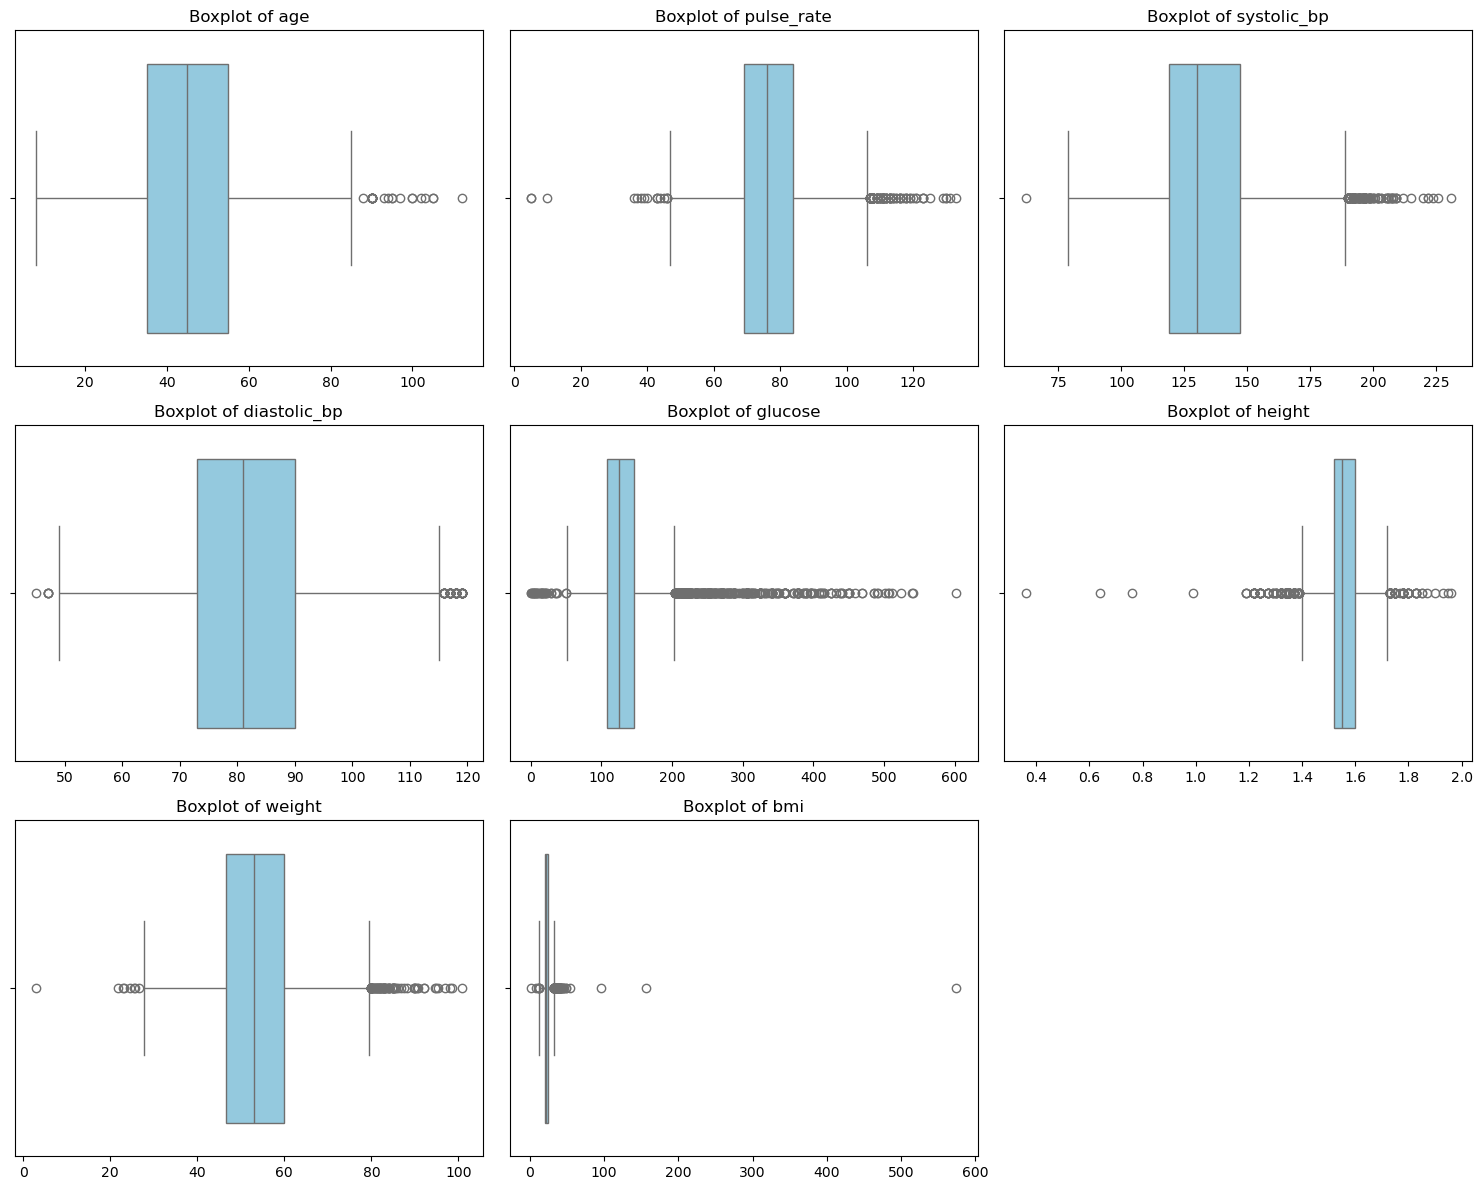

In [259]:
# Histograms
# List of feature columns
features = new_df.columns.drop("diabetic")


new_df[features].hist(bins=20, figsize=(14,10))
plt.suptitle("Histograms of Features")
plt.tight_layout()
plt.show()

# Boxplots to detect outliers
import math
numeric_features = new_df.select_dtypes(include=["number"])

# Number of features
num_features = len(numeric_features)

# Calculate grid size (e.g., for 10 features: 4 rows x 3 columns)
# Determine layout
n_cols = 3
n_rows = 3
max_plots = n_cols * n_rows

# Total number of numeric features
total = len(numeric_features)

# Only show the first (up to) 9 features at once
# Comment this next line if you want to show all features in batches
numeric_cols = numeric_features[:max_plots]  

plt.figure(figsize=(5 * n_cols, 4 * n_rows))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(x=new_df[col], color='skyblue')
    plt.title(f"Boxplot of {col}")
    plt.xlabel("")  # cleaner look

plt.tight_layout()
plt.show()


In [260]:
import pandas as pd

# Assuming df is your DataFrame

def detect_outliers(df):
    outliers_count = {}
    
    for col in df.select_dtypes(include=['number']).columns:  # Looping through numeric columns
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Counting outliers
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outliers_count[col] = outliers.shape[0]
        
    return outliers_count

# Call the function
outliers_count = detect_outliers(new_df)

print(outliers_count)


{'age': 23, 'pulse_rate': 102, 'systolic_bp': 118, 'diastolic_bp': 54, 'glucose': 408, 'height': 198, 'weight': 84, 'bmi': 139}


In [261]:
import pandas as pd

# Assuming new_df is your DataFrame

def detect_outliers_with_rows(df):
    outliers_details = {}
    
    for col in df.select_dtypes(include=['number']).columns:  # Looping through numeric columns
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Identifying outliers
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        
        # Storing count and the actual outlier rows
        outliers_details[col] = {
            'count': outliers.shape[0],
            'outliers': outliers
        }
        
    return outliers_details

# Call the function
outliers_details = detect_outliers_with_rows(new_df)

# Print out the results
for col, details in outliers_details.items():
    print(f"Outliers in column '{col}':")
    print(f"Count: {details['count']}")
    print(details['outliers'])
    print("\n")


Outliers in column 'age':
Count: 23
      age  gender  pulse_rate  systolic_bp  diastolic_bp  glucose  height  \
360    90   False          60          222           111   136.44    1.60   
404    90    True          68          180            76   151.92    1.65   
487    97    True         121          143            88   156.24    1.55   
633    94   False          81          187            86    92.16    1.32   
713   105    True          78          160            85   175.86    1.63   
768    90    True          63          132            59   139.86    1.52   
887    90    True          93          179            95   115.20    1.47   
1250   95    True          71          148            75   129.60    1.60   
1769  105   False          90          153            77   155.52    1.47   
1862   93    True          79          110            67   149.76    1.65   
2404   90    True          62          161            71   136.62    1.52   
2682  100   False          73          1

# Feature Selection

In [262]:
from scipy.stats import pointbiserialr , pearsonr

## Point-Biserial Correlation
- A method which calculates the correlation between a continuous variable (e.g. weight) and a Binary Variable (e.g. male,female)

### Point-Biserial Correlation Formula

The Point-Biserial correlation coefficient between a continuous variable \(X\) and a binary variable \(Y\) is computed using the following formula:

$$
cor_{pb} = \frac{M_1 - M_0}{s_X} \sqrt{\frac{n_1 n_0}{n(n-1)}}
$$

Where:
- \(M_1\) = Mean of \(X\) when \(Y=1\)
- \(M_0\) = Mean of \(X\) when \(Y=0\)
- \(s_X\) = Standard deviation of \(X\) (all values)
- \(n_1\) = Number of cases where \(Y=1\)
- \(n_0\) = Number of cases where \(Y=0\)
- \(n\) = Total sample size (\(n = n_1 + n_0\))


In [263]:
def correlation(df, target_column, features):

    # Ensure target is in the DataFrame
    if target_column not in df.columns:
        raise ValueError(f"Target column '{target_column}' not found in DataFrame.")

    if not features:
        raise ValueError(f"Correlation columns must be provided.")
    
    correlation_results = []

    target = df[target_column]
    for col in features:
        feature = df[col]
        
        if feature.dtype == "float64" or feature.dtype =="int64":
            cor_scipy = pointbiserialr(feature, target)
            correlation_results.append({
                'Feature': col,
                'Correlation': cor_scipy.correlation
            })

        elif feature.dtype == "boolean":
            cor_scipy = pearsonr(feature.astype(float), target.astype(float))
            correlation_results.append({
                'Feature': col,
                'Correlation': cor_scipy[0]
            })
    return pd.DataFrame(correlation_results)
        
        


In [264]:
correlation_columns = [col for col in new_df.columns if col != "diabetic"]
correlation_df = correlation(new_df, 'diabetic', correlation_columns)

In [265]:
correlation_df

,Feature,Correlation
0,age,0.087600
1,gender,0.026899
2,pulse_rate,0.046014
3,systolic_bp,0.155269
4,diastolic_bp,0.156728
5,glucose,0.305426
6,height,0.033334
7,weight,0.108157
8,bmi,0.042708
9,family_diabetes,-0.023288


In [266]:
low_corr = correlation_df[correlation_df['Correlation'].abs() < 0.04]
high_corr = correlation_df[correlation_df['Correlation'].abs() > 0.04]
print(len(low_corr), len(high_corr))



5 9


In [267]:
low_corr_columns = low_corr.Feature.tolist()
print(low_corr_columns)

['gender', 'height', 'family_diabetes', 'family_hypertension', 'stroke']


In [268]:
from imblearn.over_sampling import SMOTE
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif

In [269]:

# Oversampling
#X = df_Analysis.drop(columns=['DiagnosedWithDiabetes'])  # Replace 'DiagnosedWithDiabetes' with your target column
X=new_df.drop(['diabetic'], axis=1)
original_dtypes = X.dtypes
data_columns = X.columns.tolist()
X = X.values

y = new_df['diabetic']
y = y.values

# Apply SMOTE for upsampling the minority class in the entire dataset (for analysis, not training)
smote = SMOTE(random_state=42,) 
# Apply SMOTE to the entire dataset
X_resampled, y_resampled = smote.fit_resample(X, y)

# Combine majority and upsampled minority
X_resampled_df = pd.DataFrame(X_resampled, columns=data_columns)

for col in data_columns:
    if original_dtypes[col] == "boolean":
        X_resampled_df[col] = X_resampled_df[col].astype("int")
        X_resampled_df[col] = X_resampled_df[col].astype("boolean")
    else :
        X_resampled_df[col] = X_resampled_df[col].astype(original_dtypes[col])

y_resampled_df = pd.Series(y_resampled, name='diabetic')
y_resampled_df = y_resampled_df.astype("int")
y_resampled_df = y_resampled_df.astype("boolean")

# Combine
df_balanced = pd.concat([X_resampled_df, y_resampled_df], axis=1)

# Shuffle
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

In [270]:
print(df_balanced.head,df_balanced.shape)

<bound method NDFrame.head of        age  gender  pulse_rate  systolic_bp  diastolic_bp     glucose  \
0       40   False          75          120            80   90.000000   
1       42   False          80          115            76  272.547456   
2       38   False          91          138            97  162.000000   
3       56   False          73          168            87  242.820000   
4       50   False          66          111            73  133.380000   
...    ...     ...         ...          ...           ...         ...   
10181   43   False          88          148            91  270.000000   
10182   58   False          51          165            89  160.200000   
10183   57    True          57          135            80   85.860000   
10184   40    True          69          111            69  140.040000   
10185   40   False          71          127            78  222.901149   

         height     weight        bmi  family_diabetes  hypertensive  \
0      1.570000  61.0

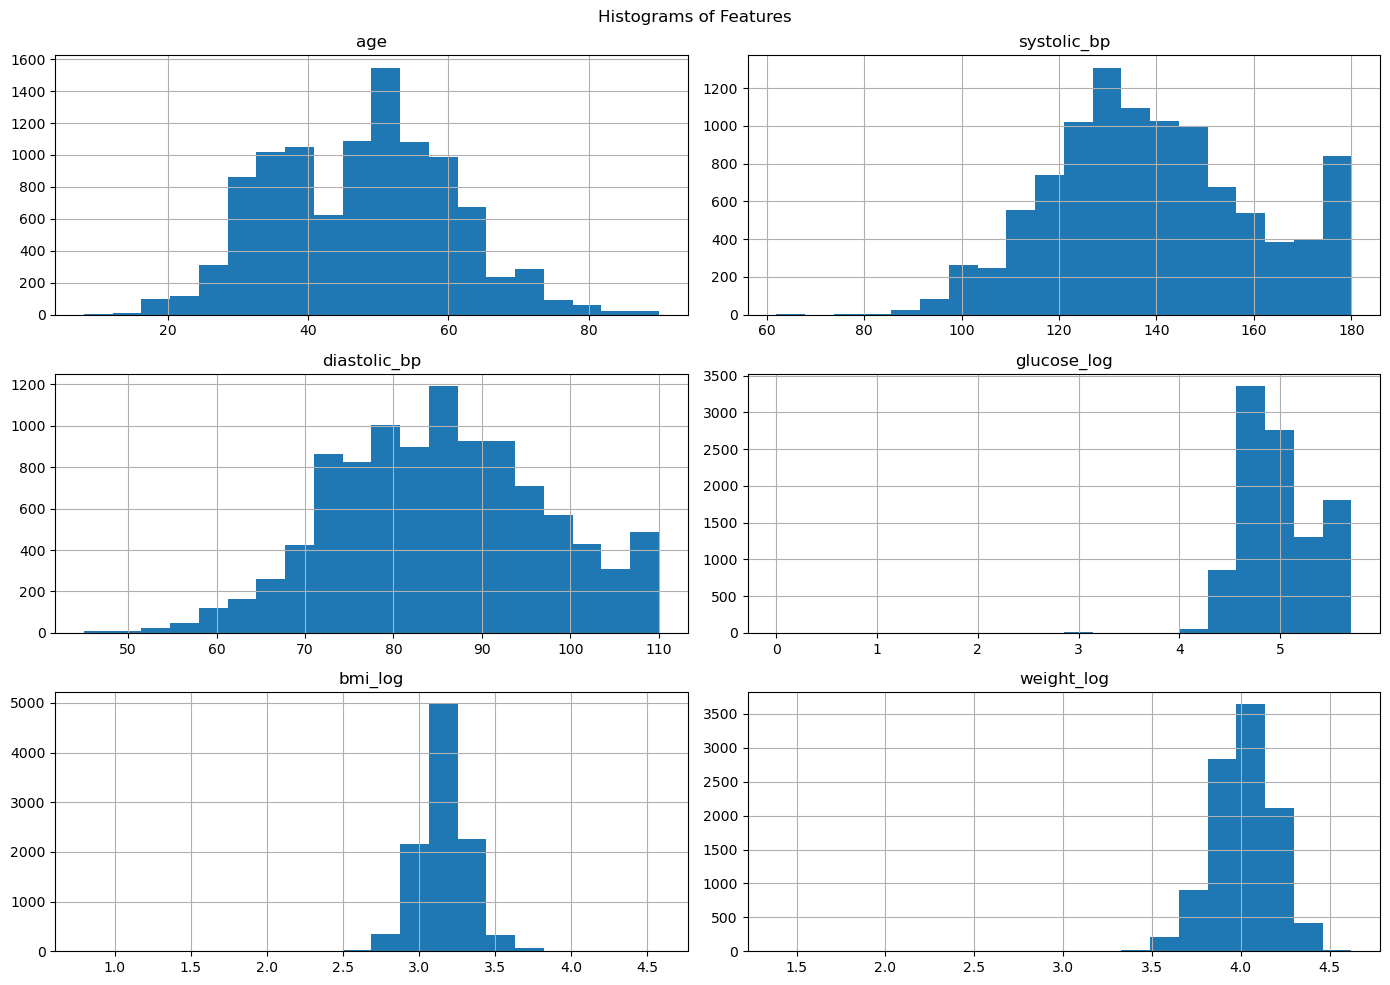

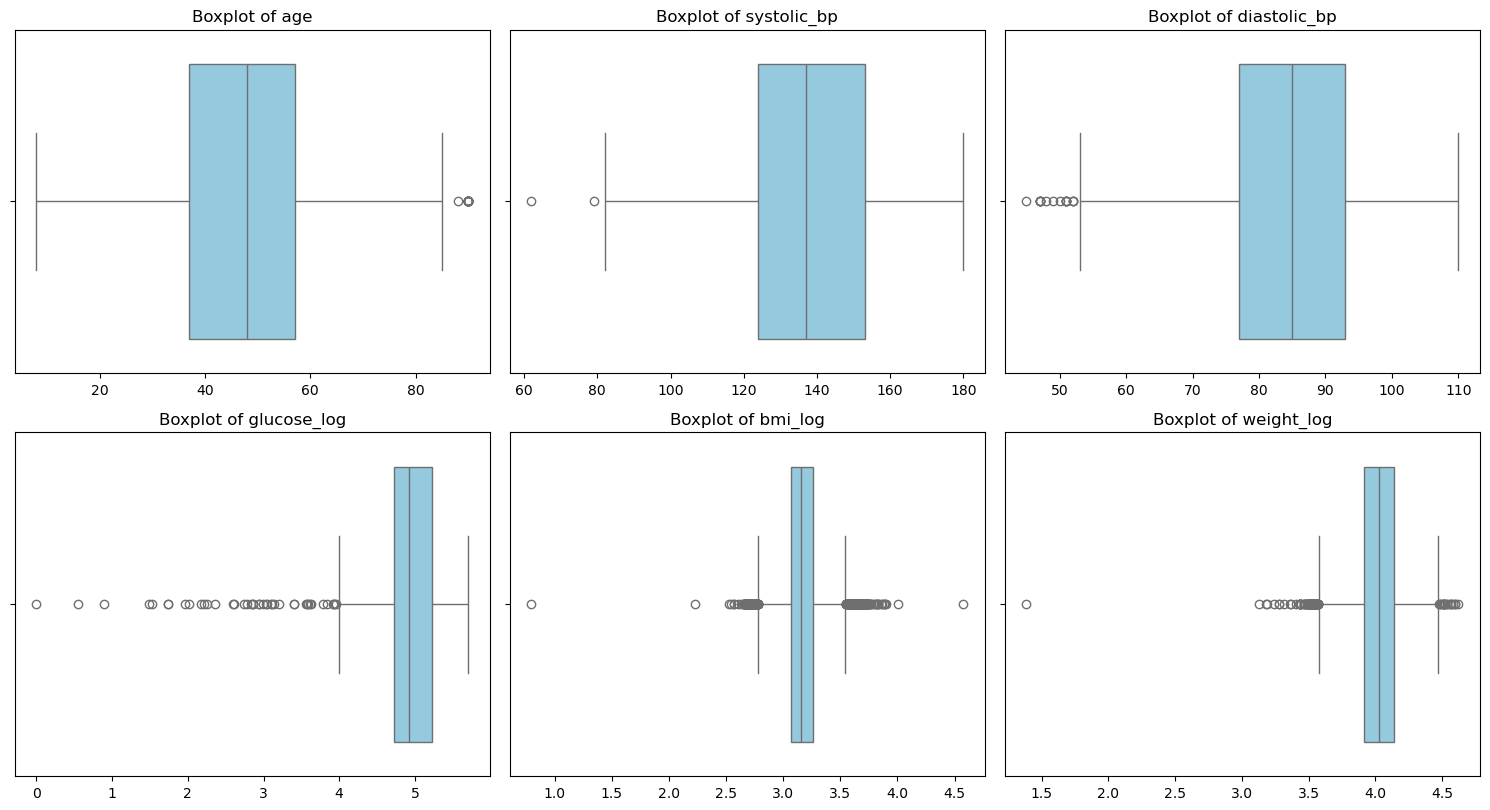

In [332]:
# Histograms
# List of feature columns
features = df_balanced.columns.drop("diabetic")


df_balanced[features].hist(bins=20, figsize=(14,10))
plt.suptitle("Histograms of Features")
plt.tight_layout()
plt.show()

# Boxplots to detect outliers
import math
numeric_features = df_balanced.select_dtypes(include=["number"])

# Number of features
num_features = len(numeric_features)

# Calculate grid size (e.g., for 10 features: 4 rows x 3 columns)
# Determine layout
n_cols = 3
n_rows = 3
max_plots = n_cols * n_rows

# Total number of numeric features
total = len(numeric_features)

# Only show the first (up to) 9 features at once
# Comment this next line if you want to show all features in batches
numeric_cols = numeric_features[:max_plots]  

plt.figure(figsize=(5 * n_cols, 4 * n_rows))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(x=df_balanced[col], color='skyblue')
    plt.title(f"Boxplot of {col}")
    plt.xlabel("")  # cleaner look

plt.tight_layout()
plt.show()


In [272]:
import pandas as pd

# Assuming df is your DataFrame

def detect_outliers(df):
    outliers_count = {}
    
    for col in df.select_dtypes(include=['number']).columns:  # Looping through numeric columns
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Counting outliers
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outliers_count[col] = outliers.shape[0]
        
    return outliers_count

# Call the function
outliers_count = detect_outliers(df_balanced)

print(outliers_count)


{'age': 23, 'pulse_rate': 87, 'systolic_bp': 141, 'diastolic_bp': 62, 'glucose': 912, 'height': 458, 'weight': 92, 'bmi': 278}


In [273]:
def count_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return ((series < lower_bound) | (series > upper_bound)).sum()

In [274]:
original_outliers = count_outliers_iqr(df_balanced['glucose'])
original_outliers

912

In [275]:
import pandas as pd
import numpy as np

# Example: Load your data (replace this with your actual file)
# df = pd.read_csv("your_dataset.csv")

# 1. Drop low-predictive features
df_balanced = df_balanced.drop(columns=['pulse_rate', 'height'], errors='ignore')

# 2. Remove extreme outliers
# Cap glucose at 300
df_balanced['glucose'] = np.where(df_balanced['glucose'] > 300, 300, df_balanced['glucose'])

# Remove unrealistic BMI values (>100)
df_balanced = df_balanced[df_balanced['bmi'] <= 100]

# Cap systolic_bp > 180
df_balanced['systolic_bp'] = np.where(df_balanced['systolic_bp'] > 180, 180, df_balanced['systolic_bp'])

# Cap diastolic_bp > 110
df_balanced['diastolic_bp'] = np.where(df_balanced['diastolic_bp'] > 110, 110, df_balanced['diastolic_bp'])

# Cap age > 90
df_balanced['age'] = np.where(df_balanced['age'] > 90, 90, df_balanced['age'])

# Cap weight > 120 kg
df_balanced['weight'] = np.where(df_balanced['weight'] > 120, 120, df_balanced['weight'])

# 3. Log transform skewed features (add +1 to avoid log(0))
df_balanced['glucose_log'] = np.log1p(df_balanced['glucose'])
df_balanced['bmi_log'] = np.log1p(df_balanced['bmi'])
df_balanced['weight_log'] = np.log1p(df_balanced['weight'])

# 4. Optional: Create age bins
#df_balanced['age_group'] = pd.cut(df_balanced['age'], bins=[0, 30, 50, 70, 100], labels=['<30', '30–50', '50–70', '70+'])

# 5. Drop original features if using transformed ones
df_balanced.drop(columns=['glucose', 'bmi', 'weight'], inplace=True)

# 6. Final look
print(df_balanced.head())


   age  gender  systolic_bp  diastolic_bp  family_diabetes  hypertensive  \
0   40   False          120            80            False         False   
1   42   False          115            76            False         False   
2   38   False          138            97            False         False   
3   56   False          168            87            False         False   
4   50   False          111            73            False         False   

   family_hypertension  cardiovascular_disease  stroke  diabetic  glucose_log  \
0                False                   False   False     False     4.510860   
1                False                   False   False      True     5.611475   
2                False                   False   False     False     5.093750   
3                False                   False   False     False     5.496430   
4                False                   False   False     False     4.900672   

    bmi_log  weight_log  
0  3.248435    4.127134  
1  3

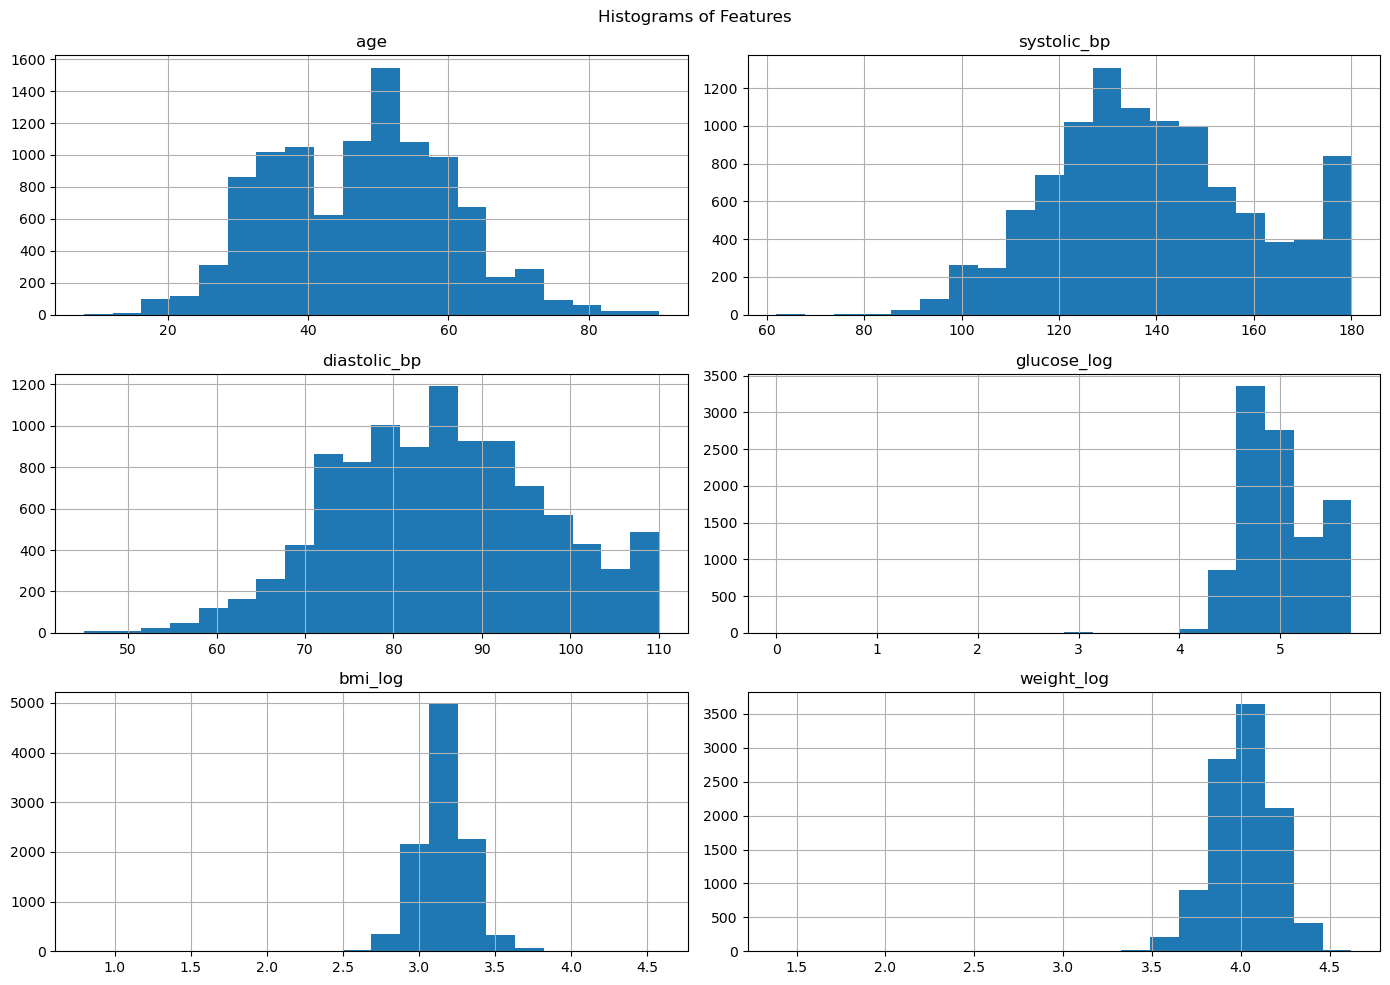

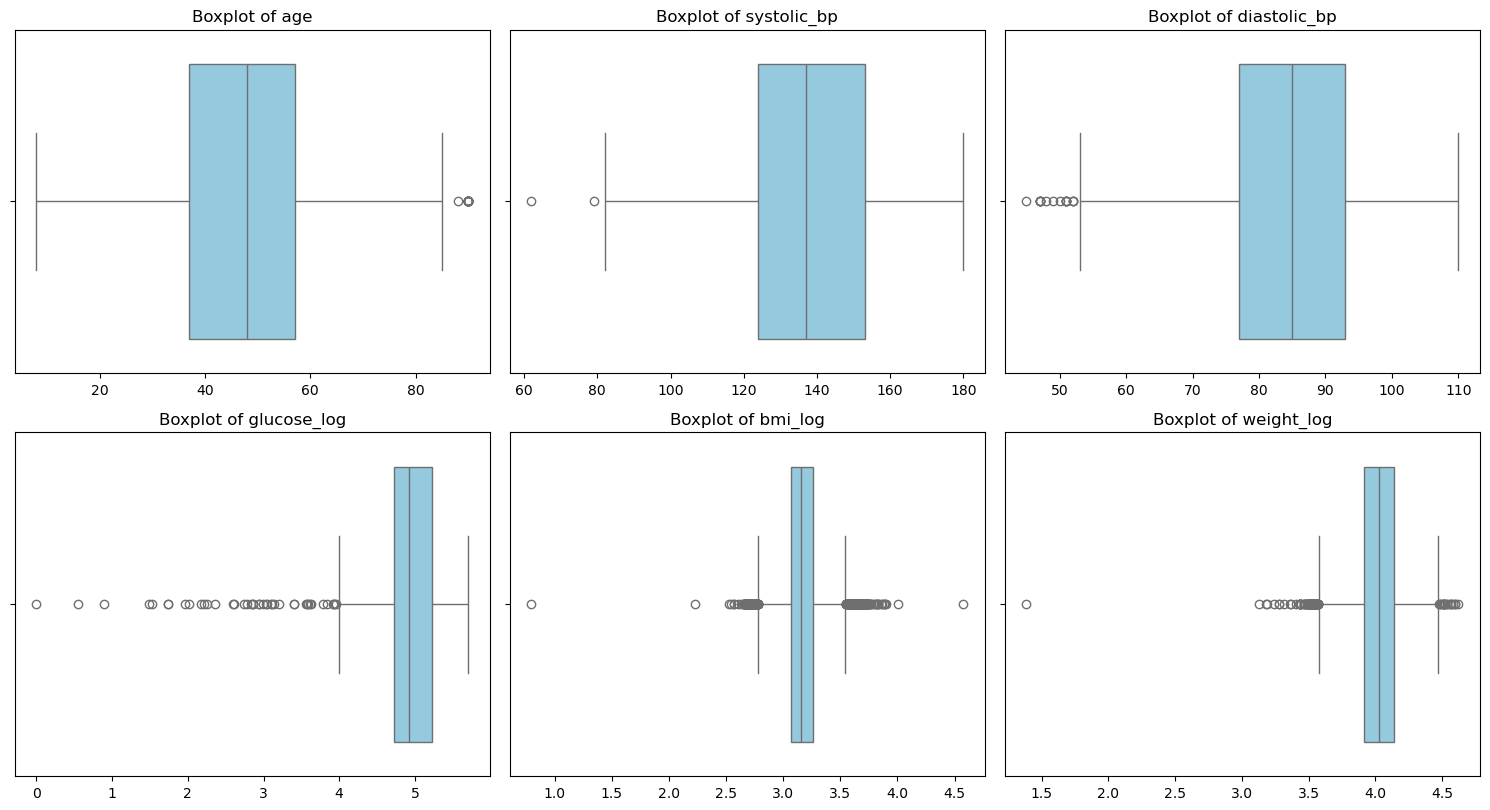

In [276]:
# Histograms
# List of feature columns
features = df_balanced.columns.drop("diabetic")


df_balanced[features].hist(bins=20, figsize=(14,10))
plt.suptitle("Histograms of Features")
plt.tight_layout()
plt.show()

# Boxplots to detect outliers
import math
numeric_features = df_balanced.select_dtypes(include=["number"])

# Number of features
num_features = len(numeric_features)

# Calculate grid size (e.g., for 10 features: 4 rows x 3 columns)
# Determine layout
n_cols = 3
n_rows = 3
max_plots = n_cols * n_rows

# Total number of numeric features
total = len(numeric_features)

# Only show the first (up to) 9 features at once
# Comment this next line if you want to show all features in batches
numeric_cols = numeric_features[:max_plots]  

plt.figure(figsize=(5 * n_cols, 4 * n_rows))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(x=df_balanced[col], color='skyblue')
    plt.title(f"Boxplot of {col}")
    plt.xlabel("")  # cleaner look

plt.tight_layout()
plt.show()


In [277]:

import pandas as pd

# Assuming df is your DataFrame

def detect_outliers(df):
    outliers_count = {}
    
    for col in df.select_dtypes(include=['number']).columns:  # Looping through numeric columns
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Counting outliers
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outliers_count[col] = outliers.shape[0]
        
    return outliers_count

# Call the function
outliers_count = detect_outliers(df_balanced)

print(outliers_count)

#{'age': 23, 'pulse_rate': 87, 'systolic_bp': 141, 'diastolic_bp': 62, 'glucose': 912, 'height': 458, 'weight': 92, 'bmi': 278}


{'age': 23, 'systolic_bp': 2, 'diastolic_bp': 17, 'glucose_log': 42, 'bmi_log': 247, 'weight_log': 104}


In [278]:
log_outliers = count_outliers_iqr(np.log1p(df_balanced['glucose_log']))
log_outliers

54

In [279]:


# Load the data
data = df_balanced.copy()

# Separate features and target
X = data.drop(['diabetic'], axis=1)
y = data['diabetic']

# Handle missing values (simple imputation for demonstration)
X = X.fillna(X.mean())

# Select top 10 features using ANOVA F-value
selector = SelectKBest(score_func=f_classif, k=10)
selector.fit(X, y)

# Get scores and p-values
scores = pd.DataFrame({'Feature': X.columns, 
                      'F-Score': selector.scores_, 
                      'p-value': selector.pvalues_})

# Sort by F-score (higher is better)
top_features = scores.sort_values('F-Score', ascending=False).head(10)
print(top_features.Feature.values)

['glucose_log' 'hypertensive' 'diastolic_bp' 'systolic_bp' 'weight_log'
 'bmi_log' 'age' 'gender' 'family_hypertension' 'family_diabetes']


In [280]:
print(top_features)

                Feature      F-Score        p-value
9           glucose_log  1908.188716   0.000000e+00
5          hypertensive  1213.854189  2.311191e-251
3          diastolic_bp  1182.442009  2.963758e-245
2           systolic_bp  1168.649347  1.442661e-242
11           weight_log   609.881315  7.977388e-131
10              bmi_log   452.471106   2.820145e-98
0                   age   348.010946   2.139591e-76
1                gender   270.010259   6.641760e-60
6   family_hypertension   182.294940   3.454499e-41
4       family_diabetes   177.155100   4.376871e-40


In [281]:
numerical_cols = df_balanced.select_dtypes(include=['float64', 'int64']).columns
boolean_cols = df_balanced.select_dtypes(include=['boolean']).columns.drop('diabetic')

In [282]:
numeric_df = df_balanced[numerical_cols.tolist() + ['diabetic']]

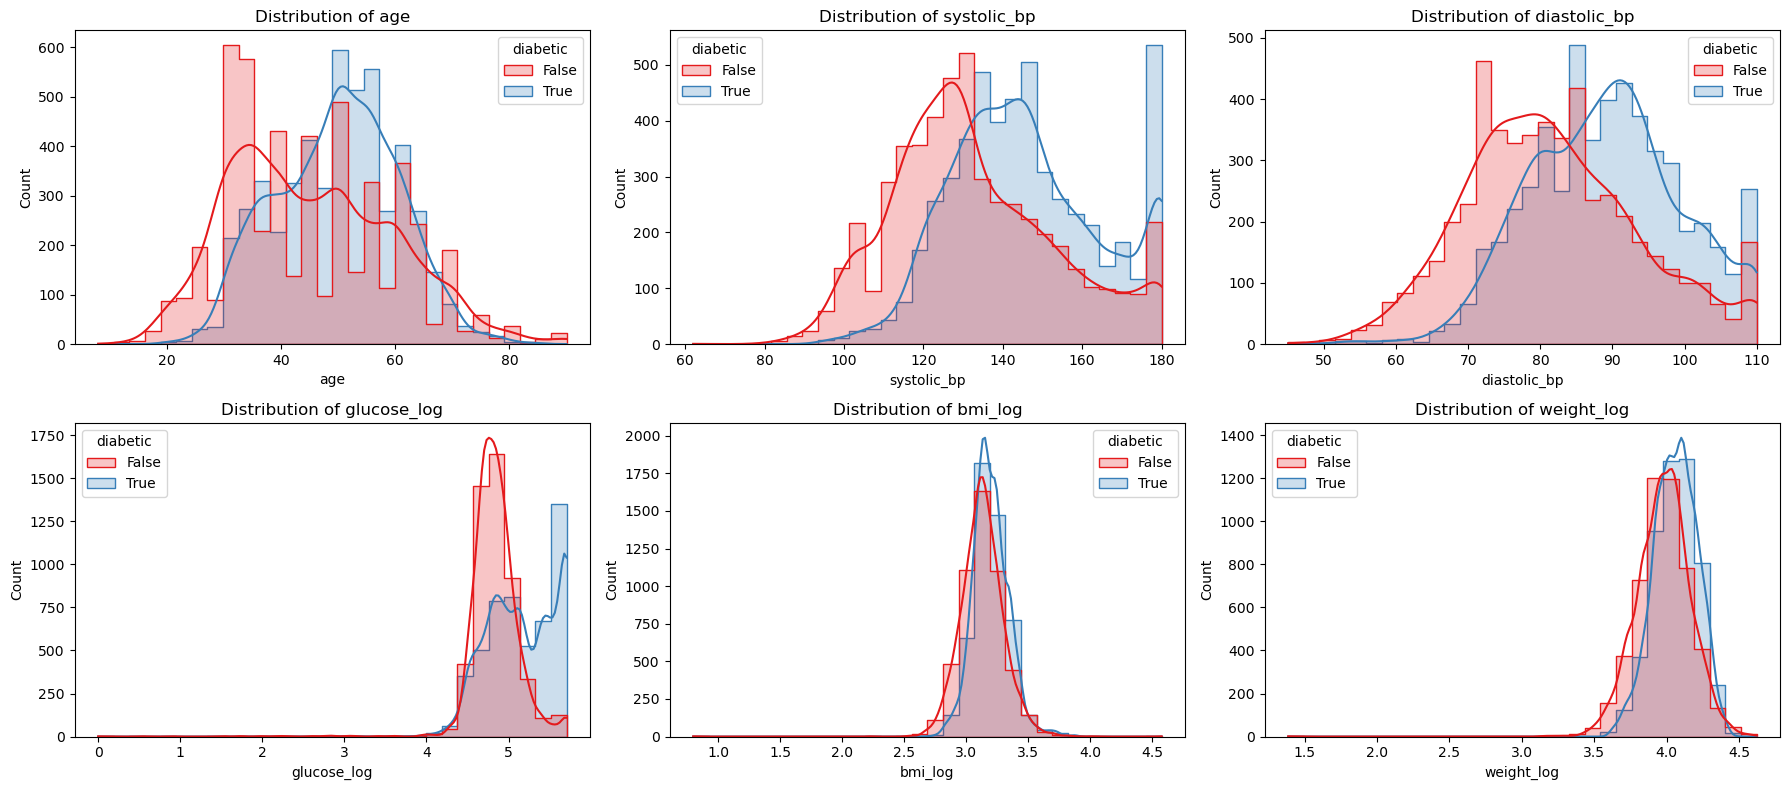

In [286]:
# Plot histograms for numerical features grouped by the target
n_cols = 3
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols

plt.figure(figsize=(n_cols * 6, n_rows * 4))
for idx, col in enumerate(numerical_cols, 1):
    plt.subplot(n_rows, n_cols, idx)
    sns.histplot(data=numeric_df, x=col, hue='diabetic', kde=True, bins=30, palette='Set1', element='step')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [287]:
bool_summary = {}

for col in boolean_cols:
    counts = df_balanced.groupby('diabetic')[col].mean() * 100  # percentage of True
    bool_summary[col] = counts

bool_df = pd.DataFrame(bool_summary).T
bool_df.columns = ['Not Diabetic (%)', 'Diabetic (%)']


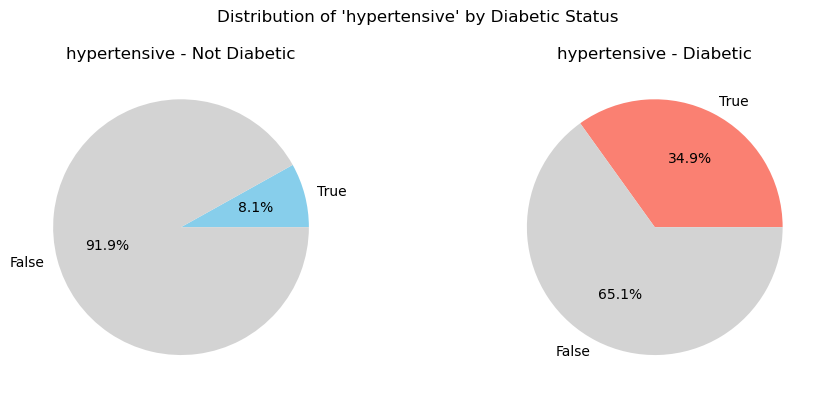

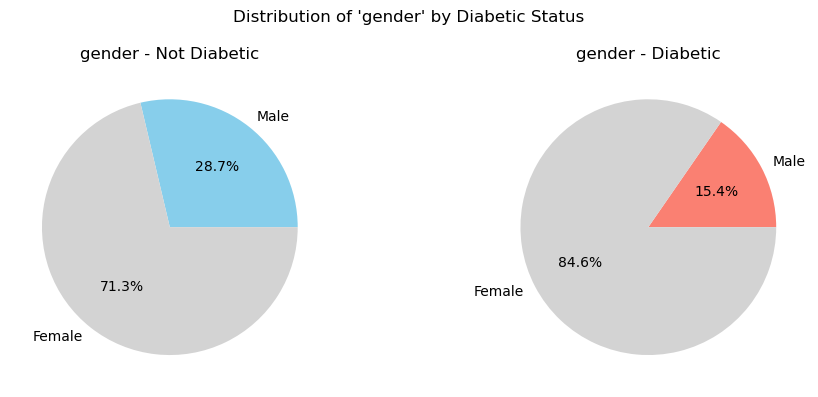

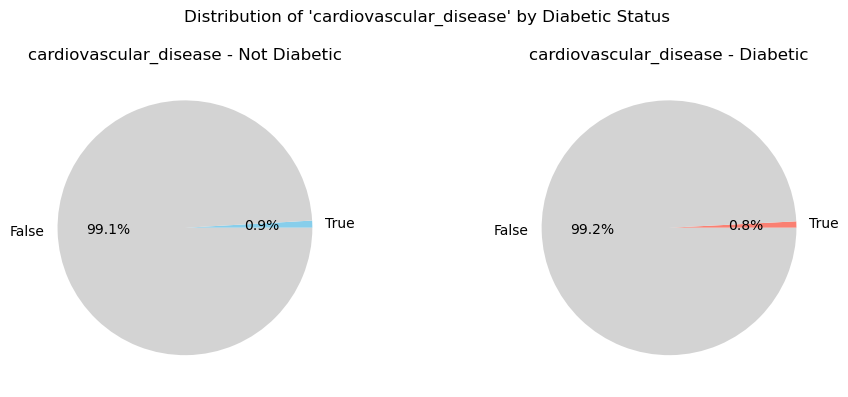

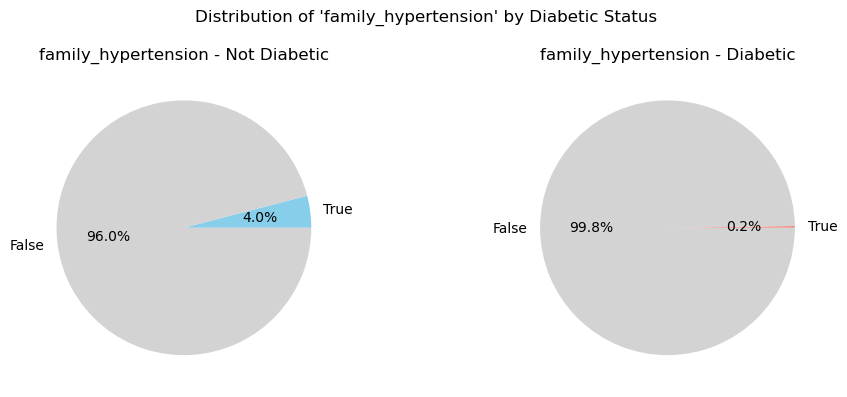

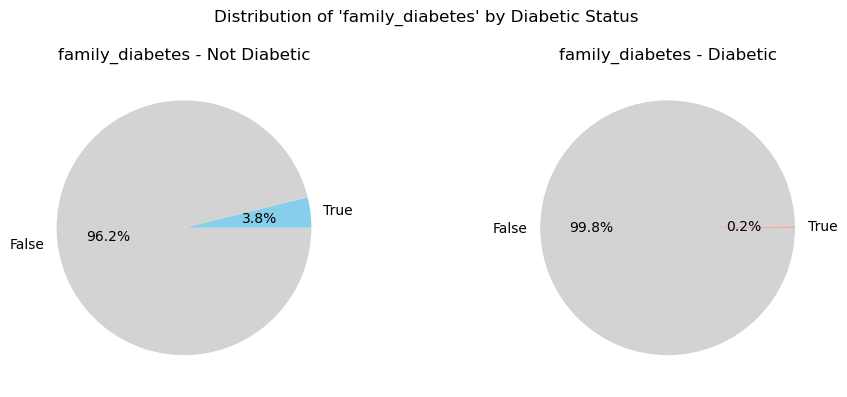

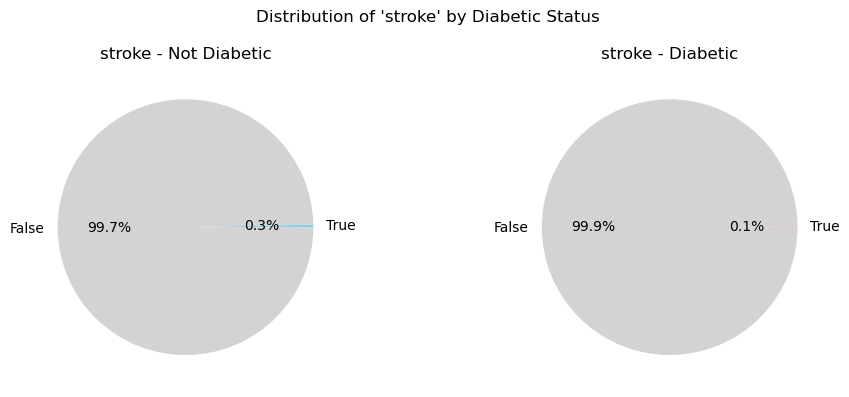

In [288]:
# Sort for consistency
bool_df = bool_df.sort_values('Diabetic (%)', ascending=False)

# Plot pie charts for each feature
for feature in bool_df.index:
    values = bool_df.loc[feature]
    fig, axs = plt.subplots(1, 2, figsize=(10, 4))
    
    labels = None
    if feature == "gender":
        labels=['Male', 'Female']
    else:
        labels=['True', 'False']

    axs[0].pie([values['Not Diabetic (%)'], 100 - values['Not Diabetic (%)']],
               labels=labels, autopct='%1.1f%%', colors=['skyblue', 'lightgray'])
    axs[0].set_title(f"{feature} - Not Diabetic")

    axs[1].pie([values['Diabetic (%)'], 100 - values['Diabetic (%)']],
               labels=labels, autopct='%1.1f%%', colors=['salmon', 'lightgray'])
    axs[1].set_title(f"{feature} - Diabetic")

    plt.suptitle(f"Distribution of '{feature}' by Diabetic Status")
    plt.tight_layout()
    plt.show()


In [289]:
# Drop low correlation columns from the DataFrame
df_AfterCorrelation = new_df.drop(columns=low_corr_columns)

# 3. Save to CSV and Excel
csv_path = "cleaned_high_corr_data.csv"

data_after_correlation_csv_path = os.path.join(current_working_dir, "dataset/CSV/cleaned_data_AfterCorrelation.csv")

if not os.path.exists(data_after_correlation_csv_path):
    df_AfterCorrelation.to_csv(data_after_correlation_csv_path, index=False)
    print(f"Data after imputation has been saved to {data_after_correlation_csv_path}.")


In [290]:
print(df_AfterCorrelation.shape, df_AfterCorrelation.dtypes.unique())

(5437, 10) [dtype('int64') dtype('float64') BooleanDtype]


# Analysis

Approximately 13.1% positive (true) and 86.9% negative (false).
Data suffers from severe Class Imbalance — accuracy alone will be misleading.

## Solutions:
- Precision, Recall, F1-score, and ROC-AUC for evaluation.
- Oversampling the minority class (e.g., SMOTE).
- Undersampling the majority class.
- Class weights in models (like class_weight='balanced' in sklearn models).

## Oversample
SMOTE is a resampling technique used to handle imbalanced datasets, where one class (usually the "positive" class) is significantly underrepresented.

Instead of just duplicating existing minority class examples, SMOTE creates synthetic examples that are similar but not identical to existing ones.

### How SMOTE Works
- Choose a minority class sample at random.
- Find its k nearest neighbors (usually k=5) in the feature space.
- Randomly select one of those neighbors.
- Generate a new sample along the line between the original and the neighbor.

In [291]:
print(df_balanced.dtypes.unique(),df_balanced.shape)


[dtype('int64') BooleanDtype dtype('float64')] (10184, 13)


In [292]:
print(df_balanced['diabetic'].value_counts(dropna=False))

diabetic
True     5093
False    5091
Name: count, dtype: Int64


In [293]:
balanced_data_csv_path = os.path.join(current_working_dir, "dataset/CSV/balanced.csv")

if not os.path.exists(balanced_data_csv_path):
    df_balanced.to_csv(balanced_data_csv_path)
    print(f"Balanced Data Saved to {balanced_data_csv_path}")



In [294]:
print(df_balanced.info())
print(df_balanced.head())

<class 'pandas.core.frame.DataFrame'>
Index: 10184 entries, 0 to 10185
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     10184 non-null  int64  
 1   gender                  10184 non-null  boolean
 2   systolic_bp             10184 non-null  int64  
 3   diastolic_bp            10184 non-null  int64  
 4   family_diabetes         10184 non-null  boolean
 5   hypertensive            10184 non-null  boolean
 6   family_hypertension     10184 non-null  boolean
 7   cardiovascular_disease  10184 non-null  boolean
 8   stroke                  10184 non-null  boolean
 9   diabetic                10184 non-null  boolean
 10  glucose_log             10184 non-null  float64
 11  bmi_log                 10184 non-null  float64
 12  weight_log              10184 non-null  float64
dtypes: boolean(7), float64(3), int64(3)
memory usage: 696.2 KB
None
   age  gender  systolic_bp  dia

In [295]:


import seaborn as sns 
import matplotlib.pyplot as plt 

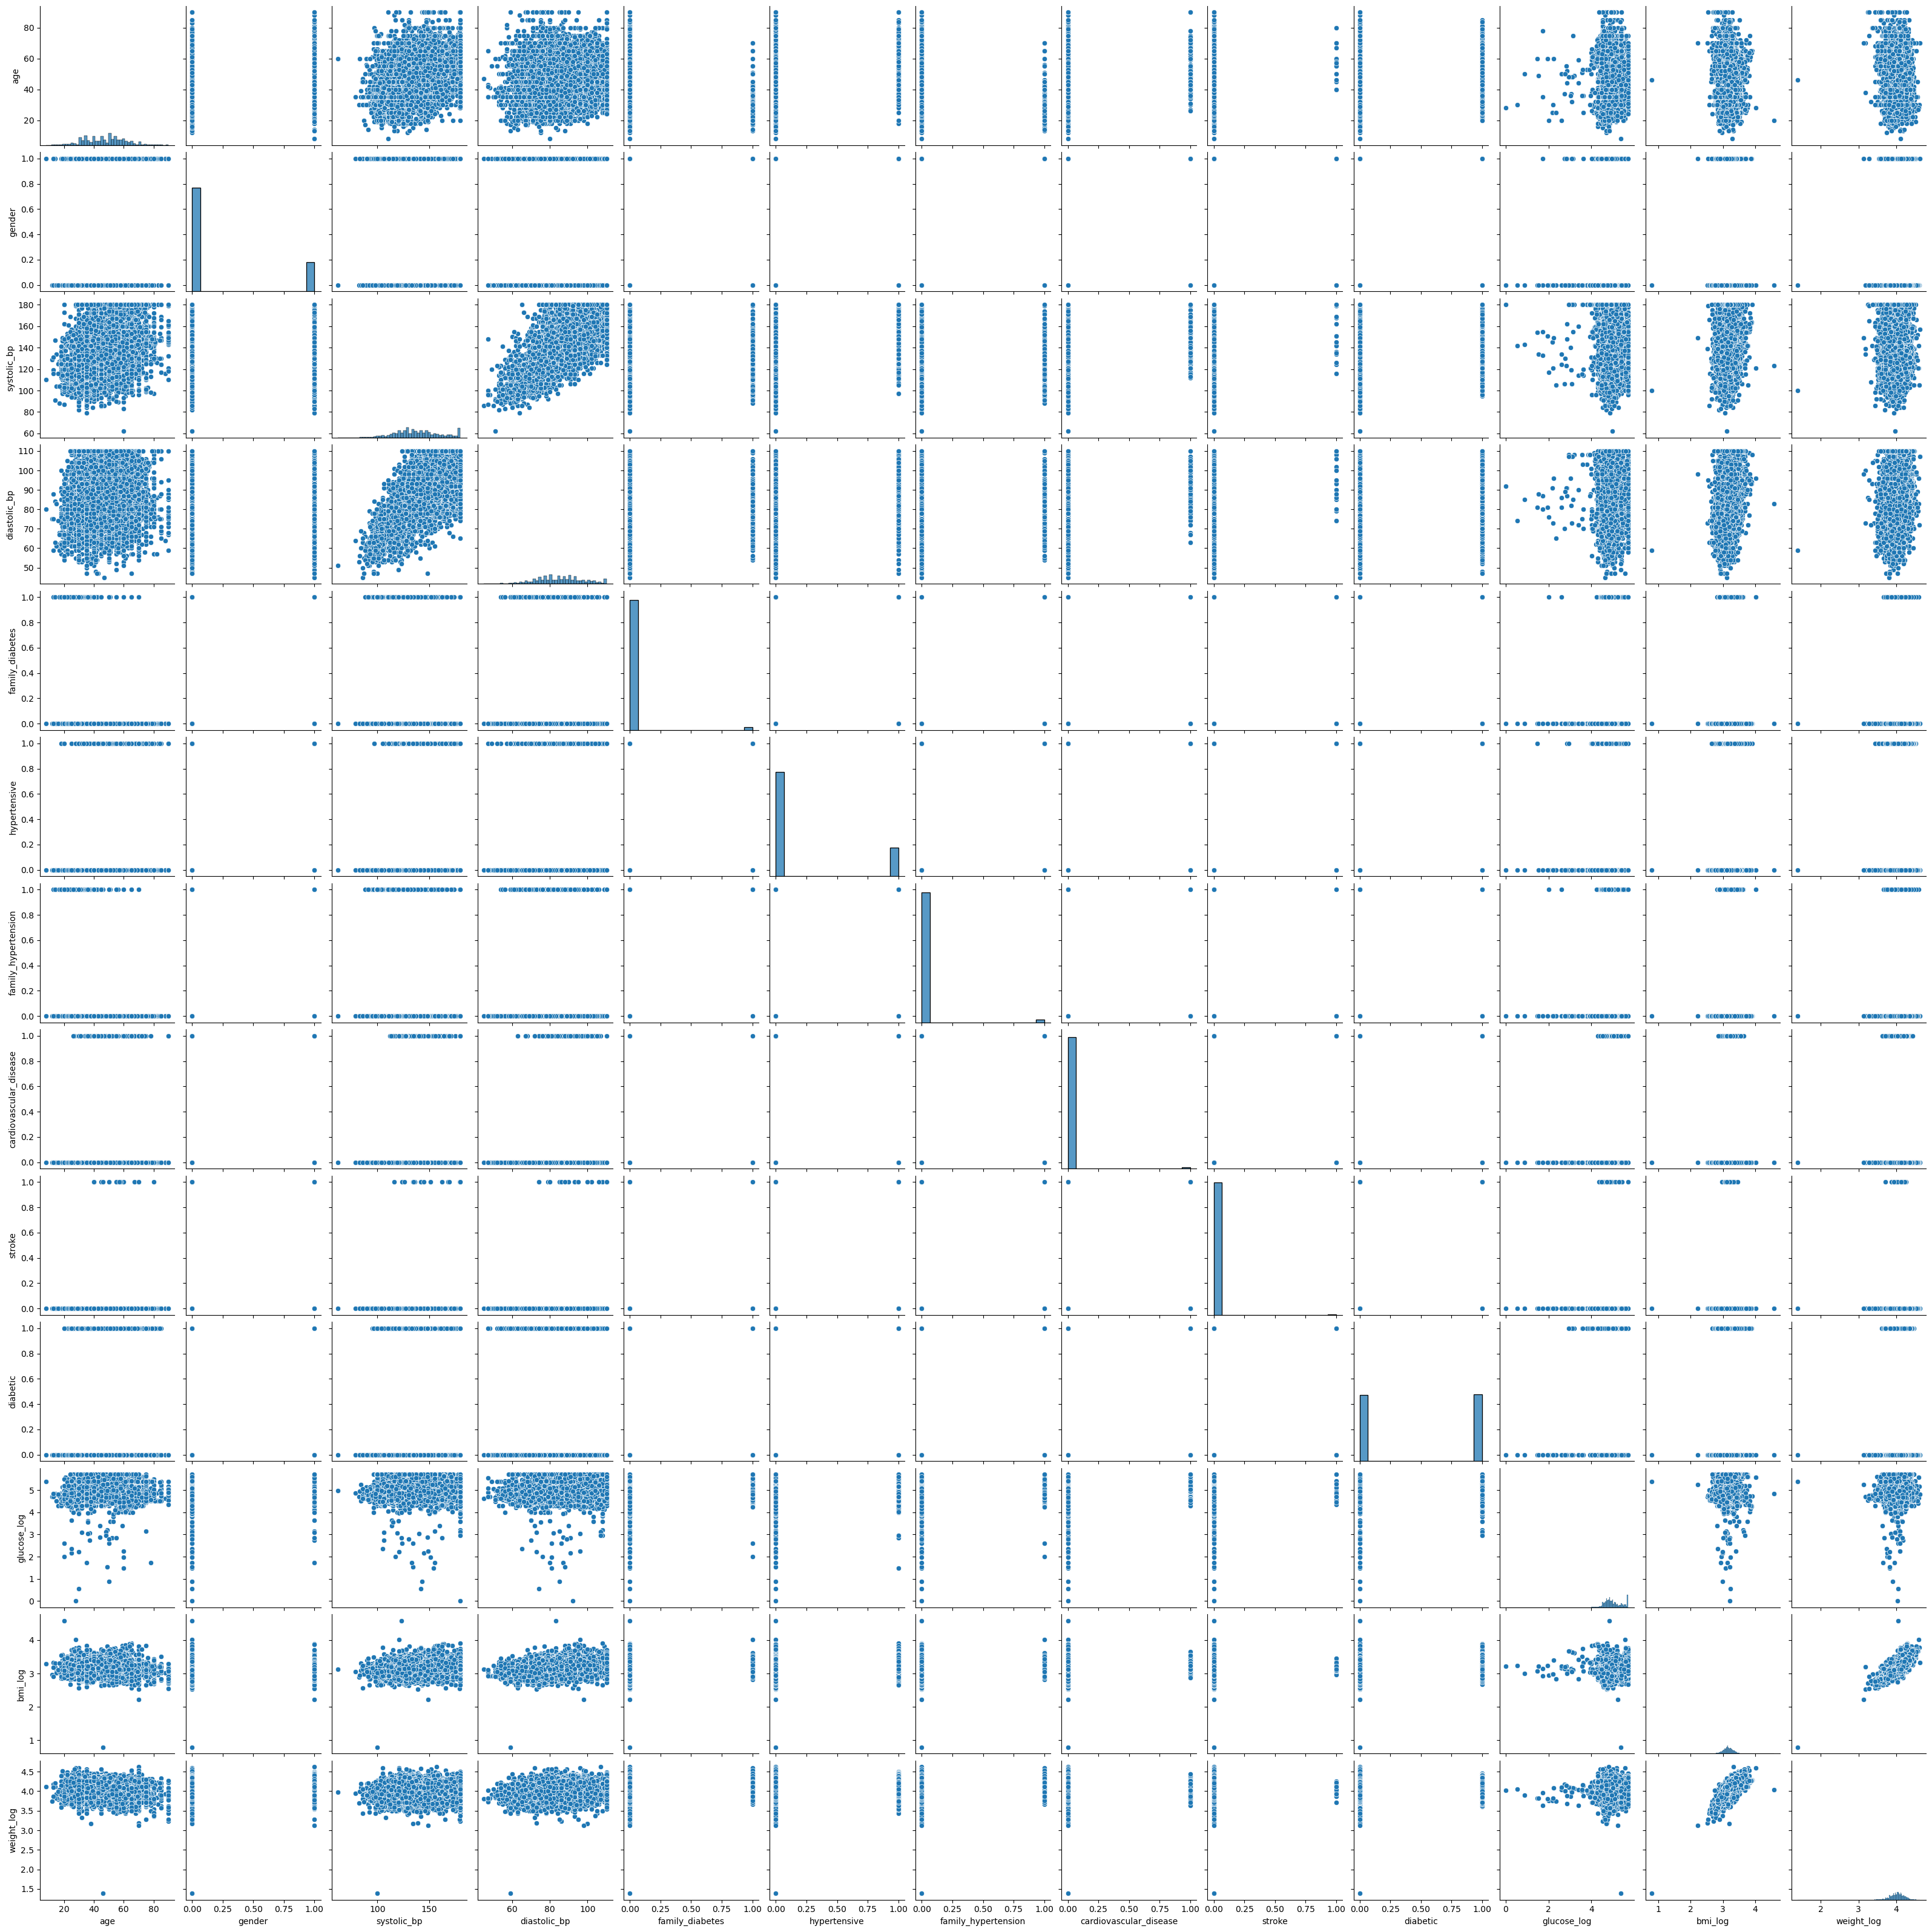

In [296]:
sns.pairplot(data = df_balanced)

In [ ]:
#sns.pairplot(df_balanced, hue="diabetic", palette="rainbow")

In [297]:
print(numerical_cols)
print(boolean_cols)

Index(['age', 'systolic_bp', 'diastolic_bp', 'glucose_log', 'bmi_log',
       'weight_log'],
      dtype='object')
Index(['gender', 'family_diabetes', 'hypertensive', 'family_hypertension',
       'cardiovascular_disease', 'stroke'],
      dtype='object')


# Model Training

**=============MACHINE LEARNING PART USING RANDOM FOREST=============**

# Random Forest

In [298]:
from Training.RandomForest import RandomForestTrainer

In [299]:
# Initialize the model and split training and test data
random_forest_model = RandomForestTrainer(df_balanced, 'diabetic', oversample=False)
print("\nData Shapes:")
print(f"xTrain: {random_forest_model.xTrain.shape}")
print(f"yTrain: {random_forest_model.yTrain.shape}")
print(f"xTest:  {random_forest_model.xTest.shape}")
print(f"yTest:  {random_forest_model.yTest.shape}")


Data Shapes:
xTrain: (8147, 12)
yTrain: (8147,)
xTest:  (2037, 12)
yTest:  (2037,)


In [300]:
random_forest_model.train()
print("Training Complete")

Training Complete


In [48]:
results = random_forest_model.evaluate() 
# Print results
print("Confusion Matrix:")
print(results["confusion_matrix"])
print("\nAccuracy:", results["accuracy"])
print("\nClassification Report:")
print(results["classification_report"])
        

Confusion Matrix:
[[835 184]
 [163 856]]

Accuracy: 0.8297350343473994

Classification Report:
              precision    recall  f1-score   support

       False       0.84      0.82      0.83      1019
        True       0.82      0.84      0.83      1019

    accuracy                           0.83      2038
   macro avg       0.83      0.83      0.83      2038
weighted avg       0.83      0.83      0.83      2038



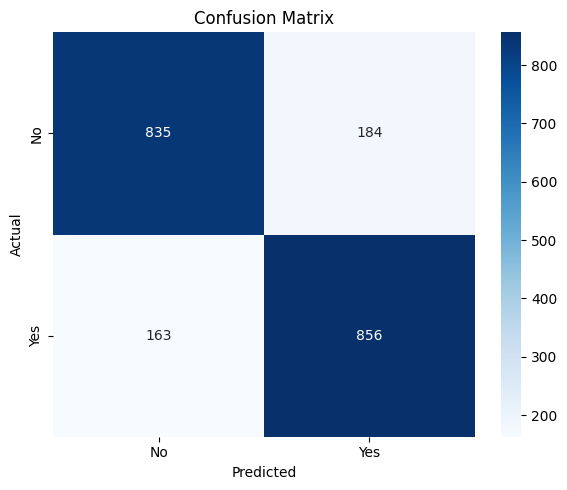

In [49]:
labels = ['No', 'Yes']
plt.figure(figsize=(6, 5))
sns.heatmap(results["confusion_matrix"], annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

In [326]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

# Assuming you've loaded your dataset into df
# df = pd.read_csv('your_data.csv')
##                Feature      F-Score        p-value
#5               glucose  2143.009592   0.000000e+00
#10         hypertensive  1215.247598  1.232029e-251
#4          diastolic_bp  1086.643813  1.596026e-226
#3           systolic_bp  1077.939496  8.187671e-225
#7                weight   557.615837  4.503204e-120
#0                   age   346.337271   4.814445e-76
#1                gender   200.914186   3.542810e-45
#11  family_hypertension   161.415673   1.053491e-36
#9       family_diabetes   155.962287   1.570025e-35
#8                   bmi   108.192090   3.262166e-25
####################################################
#              Feature      F-Score        p-value
# 9           glucose_log  1908.188716   0.000000e+00
# 5          hypertensive  1213.854189  2.311191e-251
# 3          diastolic_bp  1182.442009  2.963758e-245
# 2           systolic_bp  1168.649347  1.442661e-242
# 11           weight_log   609.881315  7.977388e-131
# 10              bmi_log   452.471106   2.820145e-98
# 0                   age   348.010946   2.139591e-76
# 1                gender   270.010259   6.641760e-60
# 6   family_hypertension   182.294940   3.454499e-41
# 4       family_diabetes   177.155100   4.376871e-40

# Define features and target
features = ['glucose_log', 'hypertensive', 'diastolic_bp', 'systolic_bp',
            'weight_log','bmi_log','age']

target = 'diabetic'  # replace with your actual target column name

# Encode categorical columns if necessary
for col in ['gender', 'family_hypertension', 'family_diabetes']:
    if df_balanced[col].dtype == 'object':
        df_balanced[col] = LabelEncoder().fit_transform(df_balanced[col])

# Drop NA
df_balanced = df_balanced.dropna(subset=features + [target])

X = df_balanced[features]
y = df_balanced[target]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       0.94      0.91      0.92      1006
         1.0       0.91      0.95      0.93      1031

    accuracy                           0.93      2037
   macro avg       0.93      0.93      0.93      2037
weighted avg       0.93      0.93      0.93      2037



C:\Users\Mostafa.Elgamal\AppData\Local\Temp\ipykernel_25348\4199101527.py:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




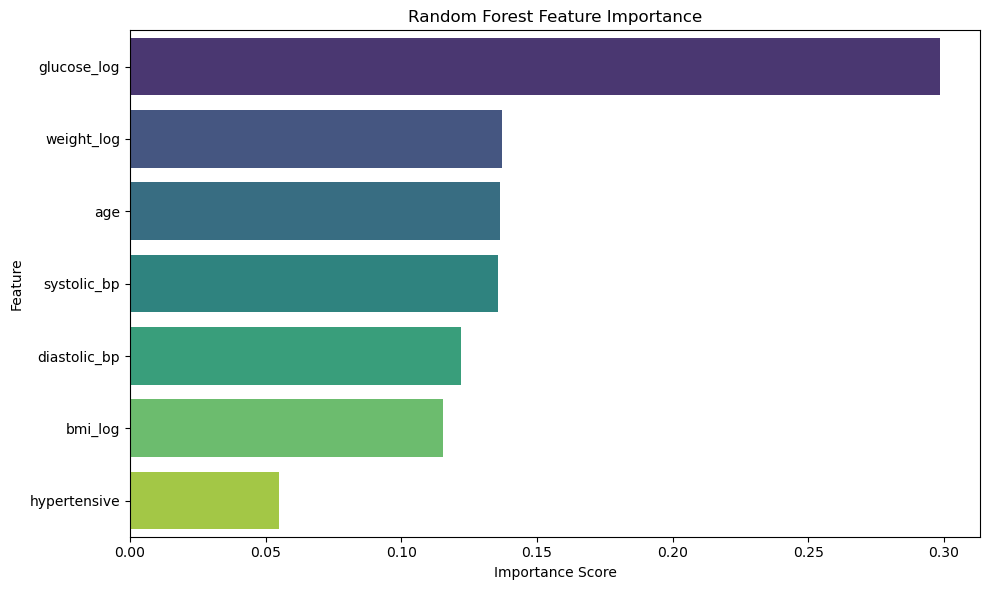

In [327]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances from the model
importances = model.feature_importances_
feature_names = X.columns

# Create a DataFrame for better plotting
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='viridis')
plt.title('Random Forest Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


In [329]:
# Example input (replace with actual values)
new_data = pd.DataFrame([{
    'glucose': 240 ,  # ≈ 19.44 mmol/L
    'hypertensive': 1,
    'diastolic_bp': 120,
    'systolic_bp': 200,
    'weight': 80,
    'bmi':40,
    'age': 60,
    
    # add missing features with default or zero values if needed
}])

input_data = pd.DataFrame([{
    'glucose_log': np.log1p(new_data['glucose']),
    'hypertensive':new_data['hypertensive'],
    'diastolic_bp': new_data['diastolic_bp'],
    'systolic_bp': new_data['systolic_bp'],
    'weight_log': np.log1p(new_data['weight']),
    'bmi_log': np.log1p(new_data['bmi']),
    'age': new_data['age']
    
    
}])

# Predict probability
proba = model.predict_proba(input_data)[0][1]
prediction = model.predict(input_data)[0]

# Output
print(f"Prediction: {'Diabetic' if prediction == 1 else 'Not Diabetic'}")
print(f"Probability of being diabetic: {proba:.2f}")


Prediction: Diabetic
Probability of being diabetic: 0.70


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\_array_api.py:751: FutureWarning:

Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\_array_api.py:751: FutureWarning:

Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead



In [323]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier  # or your model

# Example model
model = RandomForestClassifier()

# Perform 5-fold cross-validation
scores = cross_val_score(model, X, y, cv=5)

print("Cross-validation scores:", scores)
print("Average accuracy:", scores.mean())


Cross-validation scores: [0.93421699 0.92930781 0.9347079  0.92930781 0.93222004]
Average accuracy: 0.9319521080058216


In [54]:
import numpy as np
print("Standard deviation:", np.std(scores))


Standard deviation: 0.002759675394407236


In [55]:
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.


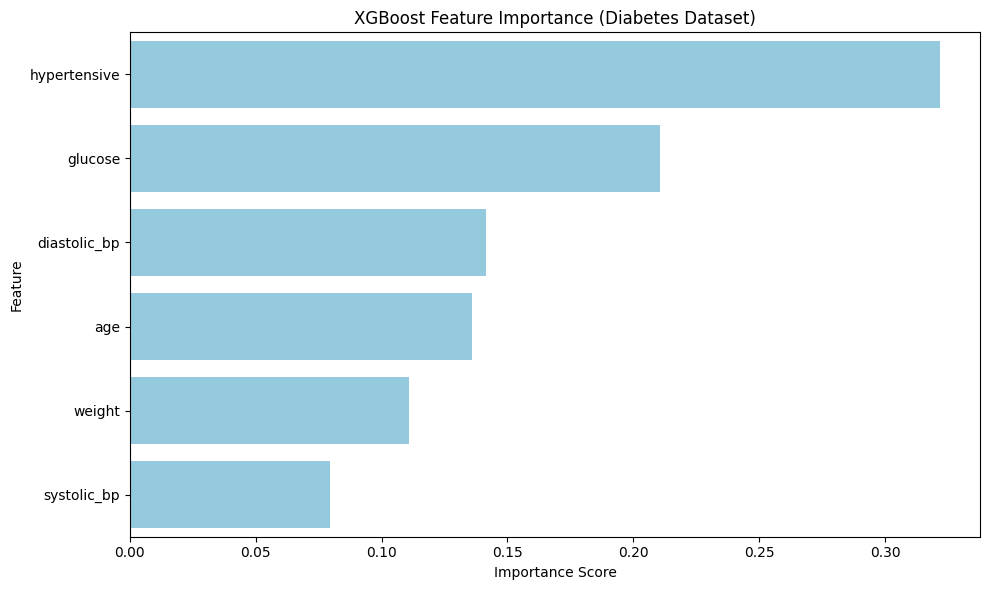

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

# Example: Load your data (replace with your dataset)
# df = pd.read_csv('diabetes.csv')
# X = df.drop('Outcome', axis=1)
# y = df['Outcome']
features = ['glucose', 'hypertensive', 'diastolic_bp', 'systolic_bp',
            'weight','age']
X = df_balanced[features]
y = df_balanced[target]
# Split your data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an XGBoost model
model = XGBClassifier(eval_metric='logloss')
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_
feature_names = X.columns

# Create DataFrame for plotting
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
#sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='mako')
sns.barplot(x='Importance', y='Feature', data=feat_imp_df, color='skyblue')  # simpler
plt.title('XGBoost Feature Importance (Diabetes Dataset)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


In [57]:
# Example input (replace with actual values)
new_data = pd.DataFrame([{
    'glucose': 160 ,  # ≈ 19.44 mmol/L
    'hypertensive': 1,
    'diastolic_bp': 120,
    'systolic_bp': 180,
    'weight': 70,
    'age': 60,
    #'pulse_rate':96
    # add missing features with default or zero values if needed
}])


# Predict probability
proba = model.predict_proba(new_data)[0][1]
prediction = model.predict(new_data)[0]

# Output
print(f"Prediction: {'Diabetic' if prediction == 1 else 'Not Diabetic'}")
print(f"Probability of being diabetic: {proba:.2f}")


Prediction: Diabetic
Probability of being diabetic: 0.88


In [58]:
random_forest_model.save_model(current_working_dir,"HC_RandomForestModel")

Model saved to d:\DPI project\DEPIGradProject/models\HC_RandomForestModel.joblib


In [59]:
import json
# Convert to DataFrame for easy sampling (if needed)
x_test_df = pd.DataFrame(random_forest_model.xTest)
# Select 10 random rows
sampled_rows = x_test_df.sample(n=10, random_state=42)
# Convert to list of lists (each row as feature vector)
payload = {
    "input": sampled_rows.values.tolist()
}
# Pretty print the payload for use in Postman or curl
print(json.dumps(payload, indent=2))

{
  "input": [
    [
      54,
      true,
      98,
      152,
      68,
      269.97998230446865,
      1.5998220649286101,
      61.982206492861,
      24.217731327839775,
      false,
      true,
      false,
      false,
      false
    ],
    [
      43,
      false,
      95,
      142,
      95,
      148.064929286129,
      1.548262051394571,
      65.44919657369526,
      27.273688539432207,
      false,
      false,
      false,
      false,
      false
    ],
    [
      55,
      false,
      79,
      139,
      110,
      270.0,
      1.53509846052361,
      61.23882410695924,
      25.893863740613103,
      false,
      false,
      false,
      false,
      false
    ],
    [
      56,
      true,
      74,
      129,
      87,
      102.92717780973366,
      1.626362757497534,
      62.48186212512331,
      23.638769985619856,
      false,
      false,
      false,
      false,
      false
    ],
    [
      50,
      false,
      71,
      133,
      82,
      122.58

**ADA boost classifier**

In [116]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
#AdaModel = AdaBoostClassifier(n_estimators=250,learning_rate=.56,random_state=42)
base = DecisionTreeClassifier(max_depth=3)
AdaModel = AdaBoostClassifier(
                              n_estimators=350,
                              learning_rate=0.65,
                              random_state=42)

In [117]:
AdaModel.fit(X_train,y_train)


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



AdaBoostClassifier(learning_rate=0.65, n_estimators=350, random_state=42)

In [118]:
y_pred=AdaModel.predict(X_test)


In [119]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [120]:
print(accuracy_score(y_test,y_pred))

0.8341511285574092


In [121]:
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[858 167]
 [171 842]]


In [122]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

         0.0       0.83      0.84      0.84      1025
         1.0       0.83      0.83      0.83      1013

    accuracy                           0.83      2038
   macro avg       0.83      0.83      0.83      2038
weighted avg       0.83      0.83      0.83      2038

